In [1]:
from styleframe import StyleFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA  # dimensional reduction
import umap  # dimensional reduction, clustering, & visualization
from sklearn.manifold import TSNE  # clustering, & visualization

In [2]:
ad1_p1_50 = 'FinalTable AD Chip1 Protein1-50 Area1-210.xlsx'
ad1_p51_100 = 'FinalTable AD Chip1 Protein 51-100 Area1-210 458 number.xlsx'
ad1_p101_150 = 'FinalTable AD Chip1 Protein101-150 Area1-210.xlsx'
ad1_p151_200 = 'FinalTable AD Chip1 Protein 151_200 Area1-210.xlsx'

ad2_p1_50 = 'FinalTable AD Chip2 Protein1-50 Area1_210.xlsx'
ad2_p51_100 = 'FinalTable AD Chip2 Protein 51-100 Area1-210 372 number.xlsx'
ad2_p101_150 = 'FinalTable AD Chip2 Protein 101_150 Area1-210.xlsx'
ad2_p151_200 = 'FinalTable AD Chip2 Protein 151_200 Area1-210.xlsx'

wt1_p1_50 = 'FinalTable WT Chip1 Protein1_50 Area1-210.xlsx'
wt1_p51_100 = 'FinalTable WT Chip1 Protein 51_100 Area1-210 453 number.xlsx'
wt1_p101_150 = 'FinalTable WT Chip1 Protein101-150_Area1-210.xlsx'
wt1_p151_200 = 'FinalTable WT Chip1 Protein151-200 Area1-210.xlsx'

wt2_p1_50 = 'FinalTable WT Chip2 Protein1-50 Area1-180.xlsx'
wt2_p51_100 = 'FinalTable WT Chip2 Protein 51_100 Area1-180 403 number.xlsx'
wt2_p101_150 = 'FinalTable WT Chip2 Protein101-150 Area1-180.xlsx'
wt2_p151_200 = 'FinalTable WT Chip2 Protein151-200 Area1-180.xlsx'


ad1 = 'AD chip 1.xlsx'
ad2 = 'AD chip 2.xlsx'
wt1 = 'WT chip 1.xlsx'
wt2 = 'WT chip 2.xlsx'

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [3]:
def sc_from_sf(xlsx_data):
    # getting single cell data from 'row' column by using the fill colors

    sf = StyleFrame.read_excel(xlsx_data, read_style=True, use_openpyxl_styles=True)

    df = sf.data_df
    x = list(df['Row'])

    row = sf['Row'][0:len(sf['Row'])-2]  # removes total sc on the bottom

    y = df['Row'].astype(str)

    yellow = 'FFFFFF00'
    green = 'FF92D050'
    red = 'FFFF0000'
    sub = []

    for i in range(len(row)):
        row_bgcolor = row[i].style.fill.start_color.index
        if row_bgcolor == yellow:
            sub.append(y[i])

    temp = pd.DataFrame(sub, columns=['Row'])
    singlecells = pd.DataFrame(columns=df.columns)

    for i in range(len(temp['Row'])):
        row = df.loc[df['Row'] == temp['Row'][i]]
        singlecells = singlecells.append(row, ignore_index=True)
    
    singlecells = singlecells.drop(columns='Row')
    singlecells = singlecells.astype(float)

    return singlecells

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [4]:
def sc_from_data(xlsx_data):
    # getting single cell and baseline data from 'cell number' column
    
    df = pd.read_excel(xlsx_data)
    singlecells = pd.DataFrame(columns=df.columns)
    #baseline = pd.DataFrame(columns=df.columns)
    
    sc_row = df.loc[df['Cell number'] == 1.0]
    singlecells = singlecells.append(sc_row, ignore_index=True)
    singlecells = singlecells.drop(columns=['Cell number', 'Row'])
    
#     bl_row = df.loc[df['Cell number'] != 1.0]
#     baseline = baseline.append(bl_row, ignore_index=True)
#     baseline = baseline.drop(columns=['Cell number', 'Row'])
    
    return singlecells.columns, singlecells


def bl_from_data(xlsx_data):
    # getting single cell and baseline data from 'cell number' column
    
    df = pd.read_excel(xlsx_data)
    #singlecells = pd.DataFrame(columns=df.columns)
    baseline = pd.DataFrame(columns=df.columns)
    
#     sc_row = df.loc[df['1 Cell number'] == 1.0]
#     singlecells = singlecells.append(sc_row, ignore_index=True)
#     singlecells = singlecells.drop(columns=['0 Cell number', '1 Cell number', 'Row'])
    
    bl_row = df.loc[df['0 Cell number'] == 1.0]
    baseline = baseline.append(bl_row, ignore_index=True)
    baseline = baseline.drop(columns=['0 Cell number', '1 Cell number', 'Row'])
    
    return baseline

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [5]:
col, ad1_sc = sc_from_data(ad1)
_, ad2_sc = sc_from_data(ad2)
_, wt1_sc = sc_from_data(wt1)
_, wt2_sc = sc_from_data(wt2)

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\xlrd\xlsx.py:39: DeprecationWarning:defusedxml.cElementTree is deprecated, import from defusedxml.ElementTree instead.


In [6]:
ad1_bl_p1_50 = bl_from_data(ad1_p1_50)
ad1_bl_p51_100 = bl_from_data(ad1_p51_100)
ad1_bl_p101_150 = bl_from_data(ad1_p101_150)
ad1_bl_p151_200 = bl_from_data(ad1_p151_200)

ad2_bl_p1_50 = bl_from_data(ad2_p1_50)
ad2_bl_p51_100 = bl_from_data(ad2_p51_100)
ad2_bl_p101_150 = bl_from_data(ad2_p101_150)
ad2_bl_p151_200 = bl_from_data(ad2_p151_200)

wt1_bl_p1_50 = bl_from_data(wt1_p1_50)
wt1_bl_p51_100 = bl_from_data(wt1_p51_100)
wt1_bl_p101_150 = bl_from_data(wt1_p101_150)
wt1_bl_p151_200 = bl_from_data(wt1_p151_200)

wt2_bl_p1_50 = bl_from_data(wt2_p1_50)
wt2_bl_p51_100 = bl_from_data(wt2_p51_100)
wt2_bl_p101_150 = bl_from_data(wt2_p101_150)
wt2_bl_p151_200 = bl_from_data(wt2_p151_200)

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [7]:
# preprocessing

def convert_to_binary(data):
    # changes string data to numeric data
    # input data.column
    
    string = list(set(data))
    num_string = len(data.value_counts())
    
    sub = {}
    for x in range(num_string):
        key = string[x]
        value = x
        sub[key] = value
        
    data = [sub[x] for x in data]
    
    return sub, data

def Normalize(data):
    data = data.fillna(0)
    data_scaled = normalize(data)
    data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
    return data_scaled

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [8]:
# make dataframe with datasets as labels

def data_df(data):
    columns = ['Label'] + list(data[0].columns)

    new = pd.DataFrame(columns=columns)
    
    n_col = len(columns)
    start_row = 0
    a = ['AD1', 'AD2', 'WT1', 'WT2']
    for j in range(len(data)):
        
        n_row = len(data[j][columns[1]])
        #label = 'data' + str(j+1)
        label = a[j]
        for i in range(n_row):
            new = new.append({'Label': label}, ignore_index=True)
        
        for i in range(n_col-1):
            col_name = new.columns[i+1]
            new[col_name][start_row:start_row+n_row] = data[j][col_name][0:n_row]
        start_row += n_row

    return new

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [9]:
# make dataframe with proteins as labels

def protein_df(sc_data):
    # sc_data is a list of all the data
    # removes rows w/ no data

    num_data = len(sc_data)
    protein_name = sc_data[0].columns
    num_protein = len(protein_name)

    column = ['Label']
    for i in range(num_data):
        column.append('Data' + str(i+1))

    df = pd.DataFrame(columns=column)


    for j in range(num_protein):

        if j == 0:
            check = []
            for k in range(num_data):
                check.append(len(sc_data[k][protein_name[j]]))
            min_num_rows = min(check)

        for i in range(min_num_rows):
            df = df.append({'Label': protein_name[j]}, ignore_index=True)

    for j in range(num_data):
        n_col = len(sc_data[j].columns)
        place = 0
        for i in range(n_col):
            df[df.columns[j+1]][place:place+min_num_rows] = sc_data[j][sc_data[j].columns[i]][0:min_num_rows]
            place += min_num_rows

    return df

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [10]:
# find average of these and then do 3xSD to get threshold then plot using umap

# take threshold for each chip and mark them all on the same data_df and plot
def get_threshold(bl_data, col):
    # bl_data is a list of all the 1 chip data for proteins 1-200 split into 4
    # col is the protein name
    
    num_data = len(bl_data)
    
    x = 0
    dict_threshold = {}
    for j in range(num_data):
        num_col = len(bl_data[j].columns)
        for i in range(num_col):
            protein = bl_data[j][bl_data[j].columns[i]]
            avg = np.mean(protein)
            std = np.std(protein)
            threshold = avg + 3*std
            dict_threshold[col[x]] = threshold
            x += 1
    
    return dict_threshold


# def get_threshold_df(bl_data, sc_data):
    
#     cutoff = pd.DataFrame(columns=['Label', sc_data.columns[protein]])
    
#     for protein in range(50):
#         avg = np.mean(bl_data[bl_data.columns[protein]])
#         std = np.std(bl_data[bl_data.columns[protein]])
#         threshold = avg + 2*std
#     #     print('Average:', avg)
#     #     print('STD:', std)
#     #     print('Threshold:', threshold)

#         n_rows = len(sc_data[sc_data.columns[protein]])
#         for j in range(n_rows):
#             value = sc_data[sc_data.columns[protein]][j]
#             if value >= threshold:
#                 cutoff = cutoff.append({'Label': 'Pass', sc_data.columns[protein]: value}, ignore_index=True)
#             else:
#                 cutoff = cutoff.append({'Label': 'Fail', sc_data.columns[protein]: value}, ignore_index=True)
    
#     return cutoff

# def get_threshold_percent(df):
    
#     num_pass = len(df[df['Label'] == 'Pass'])
#     num_fail = len(df[df['Label'] == 'Fail'])
#     threshold_percent = (num_pass/(num_pass + num_fail))*100
    
#     return threshold_percent

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [36]:
sc = data_df([ad1_sc, ad2_sc, wt1_sc, wt2_sc])
sc

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Label,GAPDH,p-PLCγ1,VGAT,β-actin,Hsp70,LC3,Akt,Nicastrin,FOX3,...,cIAP-2/HIAP-1,Oligodendrocyte Marker O4,RHOA,TNFR1,Rac1,NOL3,PI3K p85α,4EBP1,SIRT1,JNK
0,AD1,2045,1965,2015,2005,2120,2430,2710,1935,2025,...,1760,1760,2015,1915,1800,1840,1810,1800,1810,1820
1,AD1,1955,1910,1925,2085,2185,2390,2940,1910,1985,...,1990,2040,2230,1975,2810,2275,1990,2050,2275,3755
2,AD1,2005,1960,2060,1930,2075,2365,2800,1940,1910,...,1970,2110,2105,1905,1840,1950,1890,2180,2560,2240
3,AD1,2000,1960,1965,1975,2145,2445,3420,1925,2105,...,2150,2205,2440,2120,3230,2470,2130,2240,2500,2625
4,AD1,2180,1970,1935,1885,1950,2020,2100,2075,1860,...,1930,1925,2000,1930,2055,2080,1910,1960,2040,2190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,WT2,3565,3440,2850,2575,2560,2275,2280,2220,2190,...,1995,2010,2145,1985,2790,2125,1940,2065,2075,2270
1594,WT2,2360,2220,2200,2250,2215,2395,2920,2180,2200,...,1955,1965,2015,1940,1970,1995,1950,2030,1990,2085
1595,WT2,2115,2120,2125,2135,2095,2250,2465,2080,2115,...,1940,1940,1965,1950,1955,1995,1905,1985,2025,2020
1596,WT2,2315,2210,2130,2400,2170,2130,2530,2315,2160,...,1855,1905,2150,2000,1940,2015,1935,1975,1980,2020


In [12]:
# columns = ['CNPase', 'ATG5', 'Glutamine Synthetase', 'Synaptophysin', 'ALDH1L1', 'E1 Enzyme ', 'GABRG1']
# ad1_sc_x = pd.DataFrame(columns=columns)
# ad2_sc_x = pd.DataFrame(columns=columns)
# wt1_sc_x = pd.DataFrame(columns=columns)
# wt2_sc_x = pd.DataFrame(columns=columns)

# for i in range(len(columns)):
#     ad1_sc_x[columns[i]] = ad1_sc[columns[i]]
#     ad2_sc_x[columns[i]] = ad2_sc[columns[i]]
#     wt1_sc_x[columns[i]] = wt1_sc[columns[i]]
#     wt2_sc_x[columns[i]] = wt2_sc[columns[i]]
# ad1_sc_x

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [13]:
# sel = protein_df([ad1_sc_x, ad2_sc_x, wt1_sc_x, wt2_sc_x])
# make_umap(sel)

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [14]:
ad1_threshold = get_threshold([ad1_bl_p1_50, ad1_bl_p51_100, ad1_bl_p101_150, ad1_bl_p151_200], col)
ad2_threshold = get_threshold([ad2_bl_p1_50, ad2_bl_p51_100, ad2_bl_p101_150, ad2_bl_p151_200], col)
wt1_threshold = get_threshold([wt1_bl_p1_50, wt1_bl_p51_100, wt1_bl_p101_150, wt1_bl_p151_200], col)
wt2_threshold = get_threshold([wt2_bl_p1_50, wt2_bl_p51_100, wt2_bl_p101_150, wt2_bl_p151_200], col)

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
def get_threshold_df(sc_data, threshold, protein):
    # sc_data is a single df with all the data on it
    # threshold is a list of all thresholds for each protein for all datasets
    # protein is the protein name
    
    df_copy = sc_data.copy()
    
    labels = sorted(set(df_copy['Label']))
    num_labels = len(labels)
    
    place = 0
    for i in range(num_labels):
        n_rows = len(df_copy[df_copy['Label'] == labels[i]])
        threshold_value = threshold[i][protein]
        for j in range(n_rows):
            protein_value = df_copy[protein][place + j]
            if protein_value >= threshold_value:
                #df['Label'][place + j] = sc_data['Label'][place + j] + '_Pass'
                df_copy['Label'][place + j] = 'Pass'
            else:
                #df['Label'][place + j] = sc_data['Label'][place + j] + '_Fail'
                df_copy['Label'][place + j] = 'Fail'
        place += n_rows
        
    return df_copy

In [ ]:
import matplotlib
def make_umap(df):
    
    labels, _ = convert_to_binary(df['Label'])
    new_df = df.drop('Label', axis=1)
    new_df = Normalize(new_df)
    
    c = [sns.color_palette(n_colors=len(labels.keys()))[x] for x in df.Label.map(labels)]
    embedding = umap.UMAP(n_components=2,
                         min_dist=.09,
                         n_neighbors=10
                         ).fit_transform(new_df)  # small min_dist/n_neighbors tightly cluster the dots
    plt.figure(figsize=(8, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=c, s=2)
    plt.title('UMAP')
    
    label = list(labels.keys())
    color = sns.color_palette(n_colors=len(labels.keys()))
    recs = []
    for i in range(len(label)):
        recs.append(matplotlib.patches.Rectangle((0, 0), 1, 1, fc=color[i]))
    plt.legend(recs, label, title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

def make_tsne(df):
    
    labels, _ = convert_to_binary(df['Label'])
    new_df = df.drop('Label', axis=1)
    new_df = Normalize(new_df)
    
    c = [sns.color_palette(n_colors=len(labels.keys()))[x] for x in df.Label.map(labels)]
    pca_features = PCA().fit_transform(new_df)
    tsne = TSNE(n_components=2).fit_transform(pca_features)
    plt.figure(figsize=(8, 8))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=c, s=2)
    plt.title('PCA & t-SNE')
    
    label = list(labels.keys())
    color = sns.color_palette(n_colors=len(labels.keys()))
    recs = []
    for i in range(len(label)):
        recs.append(matplotlib.patches.Rectangle((0, 0), 1, 1, fc=color[i]))
    plt.legend(recs, label, title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

In [43]:
# make single umap per protein

def make_many_umap(df, iteration):
    
    labels, _ = convert_to_binary(df['Label'])
    new_df = df.drop('Label', axis=1)
    new_df = Normalize(new_df)
    
    c = [sns.color_palette(n_colors=len(labels.keys()))[x] for x in df.Label.map(labels)]
    embedding = umap.UMAP(n_components=2,
                         min_dist=.09,
                         n_neighbors=10
                         ).fit_transform(new_df)  # small min_dist/n_neighbors tightly cluster the dots
    #plt.figure(figsize=(8, 8))
    ax = axes_list.pop(0)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=c, s=2)
    plt.title(df.columns[i])
    
#     label = list(labels.keys())
#     color = sns.color_palette(n_colors=len(labels.keys()))
#     recs = []
#     for i in range(len(label)):
#         recs.append(matplotlib.patches.Rectangle((0, 0), 1, 1, fc=color[i]))
#     plt.legend(recs, label, title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
fig, axes = plt.subplots(nrows=20, ncols=10, constrained_layout=True, figsize=(22, 35))
axes_list = [item for sublist in axes for item in sublist]

num_proteins = 200
for i in range(num_proteins):
    protein = col[i]
    threshold_df = get_threshold_df(sc, [ad1_threshold, ad2_threshold, wt1_threshold, wt2_threshold], protein)
    make_many_umap(threshold_df, i)

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

     Label GAPDH p-PLCγ1  VGAT β-actin Hsp70   LC3   Akt Nicastrin  FOX3  ...  \
0      AD1  2045    1965  2015    2005  2120  2430  2710      1935  2025  ...   
1      AD1  1955    1910  1925    2085  2185  2390  2940      1910  1985  ...   
2      AD1  2005    1960  2060    1930  2075  2365  2800      1940  1910  ...   
3      AD1  2000    1960  1965    1975  2145  2445  3420      1925  2105  ...   
4      AD1  2180    1970  1935    1885  1950  2020  2100      2075  1860  ...   
...    ...   ...     ...   ...     ...   ...   ...   ...       ...   ...  ...   
1593   WT2  3565    3440  2850    2575  2560  2275  2280      2220  2190  ...   
1594   WT2  2360    2220  2200    2250  2215  2395  2920      2180  2200  ...   
1595   WT2  2115    2120  2125    2135  2095  2250  2465      2080  2115  ...   
1596   WT2  2315    2210  2130    2400  2170  2130  2530      2315  2160  ...   
1597   WT2  2310    4775  2300    2240  2250  2255  2360      2305  2210  ...   

     cIAP-2/HIAP-1 Oligoden

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


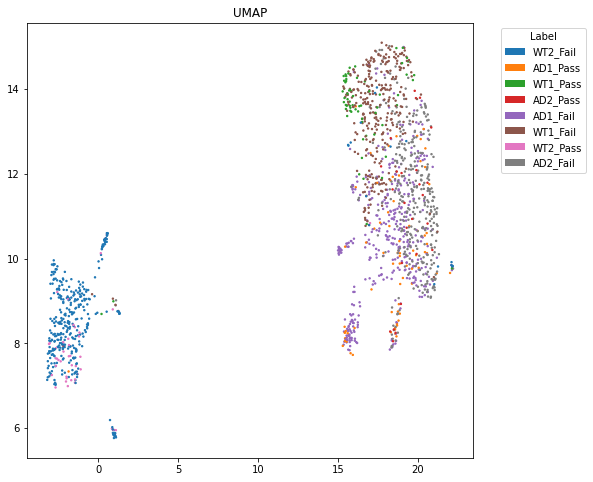

In [18]:
make_umap(sc)

In [19]:
# correlation maps

# def get_corr(data):
#     data_corr = abs(data.corr(method='spearman'))
#     data_corr = data_corr[data_corr >= .5]
#     data_corr = data_corr[data_corr <= .9999]
    
#     return data_corr


# def plot_corr(data, title):
    
#     data_corr = get_corr(data)
    
#     heatmap = sns.heatmap(data_corr, cmap='PiYG')
#     plt.title(title)
    
#     return plt.show(heatmap)


# def order_corr(data):
    
#     data_corr = get_corr(data)
#     unstacked_corr = data_corr.unstack()
#     ordered_corr = unstacked_corr.sort_values(ascending=False)
#     ordered_corr = ordered_corr[ordered_corr >= .8]
#     return ordered_corr


# def plot_bar(data1, data2, title):
#     data_corr = abs(data1.corrwith(data2, axis=0, method='spearman'))
#     bar = plt.bar(col, data_corr)
#     plt.xticks(rotation=90)
#     plt.ylabel('Correlation coefficient')
#     plt.title(title)
#     return plt.show(bar)

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [20]:
# make df from specific proteins of specific datasets

# def make_cluster_df(sc, proteins):
#     # sc - a list of the singlecell data
#     # proteins - a list of interesting proteins

#     n = len(proteins)    
#     columns = ['Label'] + proteins
#     data = pd.DataFrame(columns=columns)
    
    
#     # append the first sc data
#     for i in range(n):
#         data[proteins[i]] = sc[0][proteins[i]]
#         place = len(sc[0][proteins[i]])
#     data[columns[0]][0:place] = 'Label' + str(1)
    
    
#     # iterative of the rest sc data
#     for x in range(1, len(sc)):        
#         for z in range(len(sc[x][str(proteins[0])])):
#             data = data.append({
#                 str(proteins[0]):sc[x][str(proteins[0])][z],
#                 str(proteins[1]):sc[x][str(proteins[1])][z],
#                 str(proteins[2]):sc[x][str(proteins[2])][z],
#                 str(proteins[3]):sc[x][str(proteins[3])][z]
#                 }, 
#                 ignore_index=True)

#         data[columns[0]][place:place + len(sc[x][proteins[0]])] = 'Label' + str(x+1)
#         place += len(sc[x][proteins[0]])

#     return data

# #data = make_cluster_df([ad1_sc, wt2_sc, ad2_sc], ['protein_14', 'protein_31', 'protein_35', 'protein_50'])

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [21]:
# make single umap per protein

# def make_umap(bl_data, sc_data, protein):
#     df = get_df(bl_data, sc_data, protein)
#     labels, _ = convert_to_binary(df['Label'])
#     new_df = df.drop('Label', axis=1)
#     new_df = Normalize(new_df)

#     c = [sns.color_palette()[x] for x in df.Label.map(labels)]
#     embedding = umap.UMAP(n_components=2).fit_transform(new_df)
    
#     #ax = axes_list.pop(0)
#     plt.scatter(embedding[:, 0], embedding[:, 1], c=c, s=1)
#     plt.set_title(df.columns[1])



# fig, axes = plt.subplots(nrows=20, ncols=10, constrained_layout=True, figsize=(22, 35))
# axes_list = [item for sublist in axes for item in sublist] 

# for i in range(len(ad1_sc.columns)):
#     make_umap(ad1_bl, ad1_sc, i, axes_list)

C:\Users\jesse\Anaconda3\envs\Bioinformatics\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
